In [1]:
import seaborn
import lubw

In [2]:
df = lubw.load_raw_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156089 entries, 2008-01-01 01:00:00+01:00 to 2025-11-03 07:00:00+01:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   no2     151364 non-null  float64
 1   o3      148469 non-null  float64
 2   pm10    155214 non-null  float64
 3   pm25    97554 non-null   float64
dtypes: float64(4)
memory usage: 6.0 MB


In [3]:
df

sensor,no2,o3,pm10,pm25
startZeit,,,,
2008-01-01 01:00:00+01:00,38.31,0.15,239.41,NaN
2008-01-01 02:00:00+01:00,38.30,0.09,169.45,NaN
2008-01-01 03:00:00+01:00,32.03,1.09,74.82,NaN
2008-01-01 04:00:00+01:00,38.02,2.09,62.85,NaN
2008-01-01 05:00:00+01:00,23.26,21.68,37.08,NaN
...,...,...,...,...
2025-11-03 03:00:00+01:00,2.80,63.48,2.25,1.27
2025-11-03 04:00:00+01:00,2.85,62.74,2.08,1.27
2025-11-03 05:00:00+01:00,5.62,58.01,2.19,1.15


In [4]:
start_date, end_date = lubw.last_week_range()

In [5]:
lw = lubw.last_week(df)
lw

sensor,startZeit,no2,o3,pm10,pm25
0,2025-10-27 00:00:00+01:00,3.00,55.34,1.51,0.94
1,2025-10-27 01:00:00+01:00,2.45,56.64,1.28,0.87
2,2025-10-27 02:00:00+01:00,NaN,61.36,1.63,0.95
3,2025-10-27 03:00:00+01:00,1.79,NaN,1.74,0.95
4,2025-10-27 04:00:00+01:00,1.38,61.75,1.84,0.98
...,...,...,...,...,...
163,2025-11-02 19:00:00+01:00,5.67,63.64,1.95,1.28
164,2025-11-02 20:00:00+01:00,5.47,62.88,2.13,1.26
165,2025-11-02 21:00:00+01:00,5.76,61.75,1.94,1.24
166,2025-11-02 22:00:00+01:00,5.33,61.21,2.09,1.28


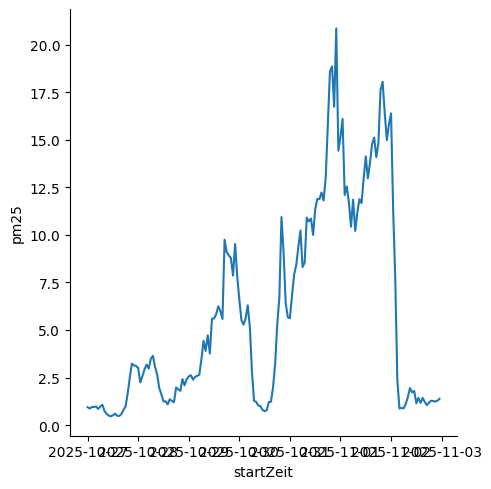

In [6]:
seaborn.relplot(
    kind="line",
    data=lw,
    x="startZeit",
    y="pm25",
)
# On the dashboard, we probably want to take an entire week, from monday to sunday. And maybe fixate it.

In [7]:
weekly = lubw.weekly_stats(df)
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   week_start   930 non-null    object 
 1   week_ending  930 non-null    object 
 2   no2_mean     930 non-null    float64
 3   no2_median   930 non-null    float64
 4   no2_min      930 non-null    float64
 5   no2_max      930 non-null    float64
 6   o3_mean      929 non-null    float64
 7   o3_median    929 non-null    float64
 8   o3_min       929 non-null    float64
 9   o3_max       929 non-null    float64
 10  pm10_mean    929 non-null    float64
 11  pm10_median  929 non-null    float64
 12  pm10_min     929 non-null    float64
 13  pm10_max     929 non-null    float64
 14  pm25_mean    584 non-null    float64
 15  pm25_median  584 non-null    float64
 16  pm25_min     584 non-null    float64
 17  pm25_max     584 non-null    float64
dtypes: float64(16), object(2)
memory usage: 130.9+ KB


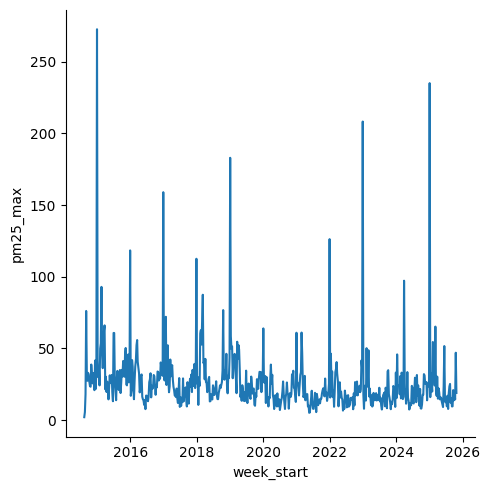

In [8]:
seaborn.relplot(
    kind="line",
    data=weekly,
    x="week_start",
    y="pm25_max",
)

In [9]:
moy = lubw.month_of_year_stats(df)
moy

,month,month_name,no2_mean,no2_median,no2_min,no2_max,o3_mean,o3_median,o3_min,o3_max,pm10_mean,pm10_median,pm10_min,pm10_max,pm25_mean,pm25_median,pm25_min,pm25_max
0,1,January,26.353926,24.54,0.21,111.62,30.488386,28.345,0.00,89.37,20.170514,16.08,0.25,745.31,13.124758,10.320,0.13,272.73
1,2,February,27.878011,25.18,0.02,119.28,35.752930,36.480,-0.55,109.21,23.395268,19.22,-0.33,132.86,15.005013,11.765,0.18,92.91
2,3,March,23.075574,19.17,0.01,110.90,49.308036,52.640,0.07,125.89,22.061821,18.36,0.32,317.78,13.982135,10.830,0.20,97.21
3,4,April,18.044682,14.89,0.02,105.34,64.209562,65.840,0.01,159.33,17.123385,14.63,0.33,107.04,9.541159,7.920,0.16,52.29
4,5,May,12.740756,10.88,0.07,107.37,70.199491,68.880,0.05,162.98,12.494185,11.01,0.68,85.04,6.835724,5.980,0.30,31.80
5,6,June,10.777320,9.29,0.08,73.99,75.229895,72.255,5.85,182.90,13.122147,11.71,0.59,80.83,7.359736,6.470,0.45,51.60
6,7,July,11.242750,9.48,0.09,85.20,74.327050,70.700,1.53,199.46,12.782241,11.14,0.61,89.71,6.937329,5.960,0.39,60.75
7,8,August,13.106608,11.11,0.11,101.46,66.872520,63.820,0.25,203.17,13.221738,11.69,0.25,158.89,7.857383,6.670,0.44,34.27
8,9,September,16.098735,13.63,0.34,89.14,48.506442,47.500,0.04,155.59,13.775305,12.24,0.14,64.91,8.615055,7.290,0.26,76.09
9,10,October,20.458646,18.69,0.35,93.16,27.123685,23.220,0.01,105.83,15.971984,13.94,-0.22,243.01,10.391661,8.735,0.17,76.70


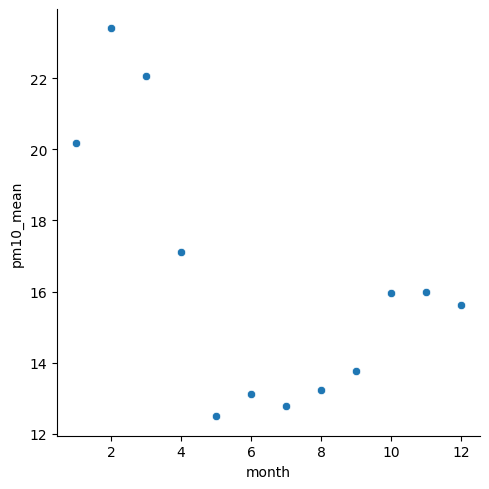

In [10]:
seaborn.relplot(
    data=moy,
    x="month",
    y="pm10_mean",
)

In [11]:
dow = lubw.day_of_week_stats(df)
dow

,day_of_week,day,no2_mean,no2_median,no2_min,no2_max,o3_mean,o3_median,o3_min,o3_max,pm10_mean,pm10_median,pm10_min,pm10_max,pm25_mean,pm25_median,pm25_min,pm25_max
0,0,Mon,18.699078,15.34,0.08,96.78,49.120137,47.940,0.02,168.58,15.074415,12.28,0.28,422.03,9.446011,7.20,0.19,112.53
1,1,Tue,19.741686,16.07,0.01,111.62,49.211639,48.245,0.00,183.73,16.284055,13.12,0.40,745.31,10.016200,7.49,0.18,183.00
2,2,Wed,20.360757,16.82,0.02,110.90,49.021545,47.550,0.01,197.09,17.164004,14.04,0.20,1323.33,10.333087,8.02,0.13,235.12
3,3,Thu,20.636401,16.92,0.09,135.26,48.544750,46.885,0.01,182.04,17.387050,14.16,0.29,646.15,10.361840,8.15,0.24,272.73
4,4,Fri,20.415834,16.83,0.02,119.28,49.074466,47.300,-0.55,203.17,17.052845,14.15,0.27,432.45,10.710946,8.41,0.15,118.36
5,5,Sat,18.125329,14.71,0.01,104.85,50.267543,49.330,0.01,180.16,16.178820,13.27,-0.33,187.35,10.673135,8.52,0.16,126.23
6,6,Son,15.452610,12.12,0.04,89.78,51.790382,51.500,0.01,180.28,14.845870,12.05,-0.25,246.56,9.894285,7.49,0.15,208.31


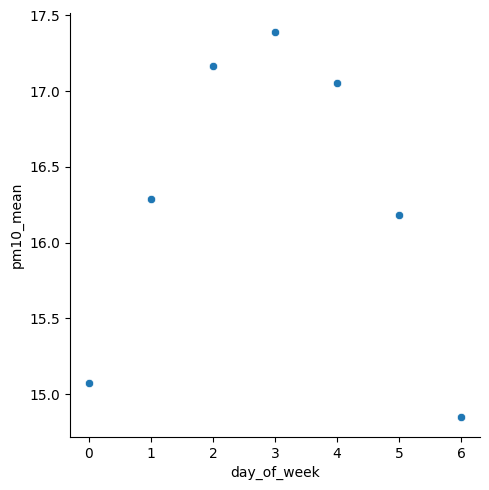

In [12]:
seaborn.relplot(
    data=dow,
    x="day_of_week",
    y="pm10_mean",
)

In [13]:
hod = lubw.hour_of_day_stats(df)
hod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  24 non-null     int32  
 1   no2_mean     24 non-null     float64
 2   no2_median   24 non-null     float64
 3   no2_min      24 non-null     float64
 4   no2_max      24 non-null     float64
 5   o3_mean      24 non-null     float64
 6   o3_median    24 non-null     float64
 7   o3_min       24 non-null     float64
 8   o3_max       24 non-null     float64
 9   pm10_mean    24 non-null     float64
 10  pm10_median  24 non-null     float64
 11  pm10_min     24 non-null     float64
 12  pm10_max     24 non-null     float64
 13  pm25_mean    24 non-null     float64
 14  pm25_median  24 non-null     float64
 15  pm25_min     24 non-null     float64
 16  pm25_max     24 non-null     float64
dtypes: float64(16), int32(1)
memory usage: 3.2 KB


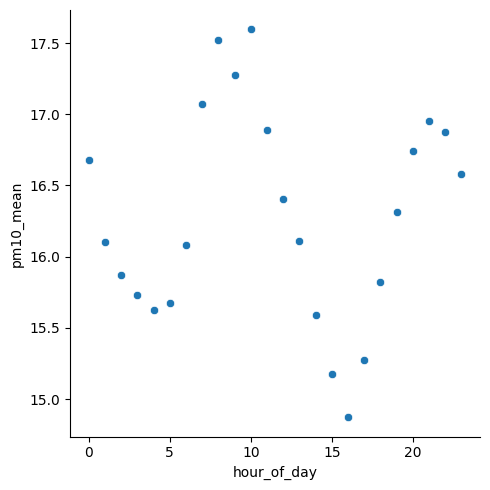

In [14]:
seaborn.relplot(
    data=hod,
    x="hour_of_day",
    y="pm10_mean",
)